<a href="https://colab.research.google.com/github/YounseoKim62/python_for_DA/blob/main/3_franchise_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내용
- pandas를 사용하여 원하는 columns만 가져오기
- pandas를 사용하여 새로운 column 생성
- folium의 plugins를 사용하여 지도에 다양한 시각화

## 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False # 음수가 깨질때

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

## 데이터 불러오기

### 데이터 파일을 불러오고 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/3. 프랜차이즈 입점 분석/상가업소정보_201912_01.csv',
                 sep = '|')

df.head()

Mounted at /content/drive


상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

### 데이터 요약

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 확인

In [ ]:
# mean()을 사용하면 결측치의 비율을 확인 할 수 있음
n = df.isnull().mean()
n

상가업소번호       0.000000
상호명          0.000002
지점명          0.866347
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.059946
표준산업분류명      0.059946
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.172145
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물부번지        0.874515
건물관리번호       0.000000
건물명          0.537010
도로명주소        0.000000
구우편번호        0.000000
신우편번호        0.000016
동정보          0.911351
층정보          0.394912
호정보          0.851370
경도           0.000000
위도           0.000000
dtype: float64

Text(0, 0.5, 'columns')

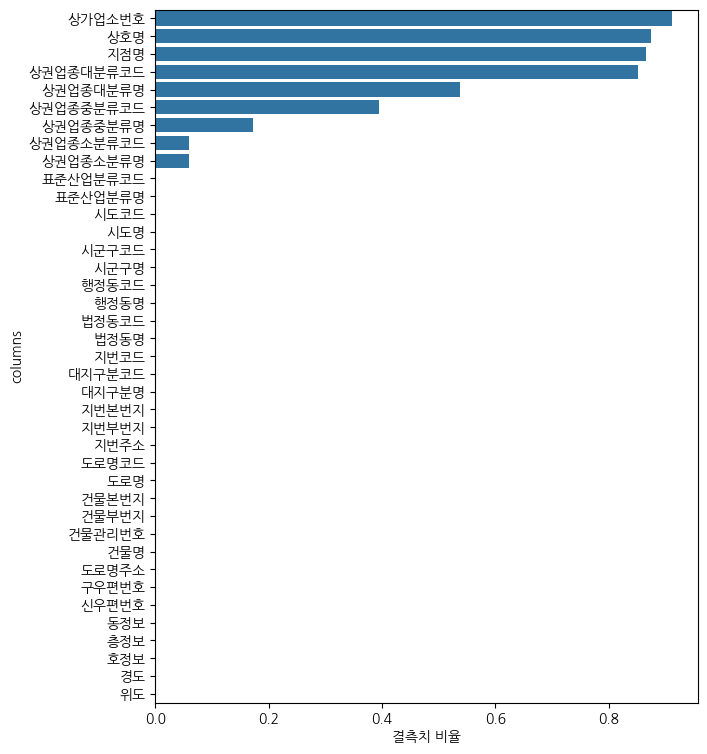

In [ ]:
plt.figure(figsize = (7, 9))
sns.barplot(x = n.sort_values(ascending = False),
            y = n.index,
            orient = 'h')
plt.xlabel('결측치 비율')
plt.ylabel('columns')

### 필요한 columns 따로 저장하기

In [ ]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소',
           '경도', '위도']
df = df[columns].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 인덱싱을 사용하여 서브셋 만들기

### 서울만 따로 보기

In [ ]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
5            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
4       서울특별시 송파구 가락로 71  127.104071  37.500249  
5  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [ ]:
df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [ ]:
df_seoul['시군구명'].nunique()

25

## 서브셋을 파일로 저장하기

In [ ]:
df_seoul.to_csv('/content/drive/MyDrive/데이터 분석/공부/3. 프랜차이즈 입점 분석/seoul_open_store.csv', index=False)

In [ ]:
# 제대로 저장이 되었는지 확인
pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/3. 프랜차이즈 입점 분석/seoul_open_store.csv').head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
4            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3       서울특별시 송파구 가락로 71  127.104071  37.500249  
4  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

## 베스킨라빈스, 던킨도너츠 위치 분석

### 베스킨라빈스와 던킨도너츠만 가져오기

In [ ]:
# 영어로 등록된 column에는 소문자와 대문자가 섞여있을 수 있으니
# '상호명_소문자' column을 생성
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [ ]:
# str.extract('정규표현식')는 column의 데이터에 정규표현식 내용이 포함되어있으면
# 포함되는 부분만 return, 포함되지 않는 경우에는 NaN값을 return

# 따로 column을 지정해주지 않으면 '0'이라는 column을 새로 생성
df_seoul['상호명_소문자'].str.extract('(베스킨라빈스|배스킨라빈스|baskinrobbins)')[0].value_counts()

0
배스킨라빈스           347
베스킨라빈스           117
baskinrobbins      2
Name: count, dtype: int64

In [ ]:
# contains()를 사용하여 혹시 놓친것이 없는지 extract()의 결과와 비교
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('(베스킨라빈스|배스킨라빈스|baskinrobbins)'),
             '상호명_소문자'].shape

<ipython-input-9-f7cdb50935ef>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_seoul.loc[df_seoul['상호명_소문자'].str.contains('(베스킨라빈스|배스킨라빈스|baskinrobbins)'),


(466,)

In [ ]:
df_seoul['상호명_소문자'].str.extract('(던킨|dunkin)')[0].value_counts()

0
던킨        190
dunkin      1
Name: count, dtype: int64

In [ ]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'),
             '상호명_소문자'].shape

(191,)

In [ ]:
# '상호명_소문자' column에
# '배스킨|베스킨|baskin|던킨|dunkin'을 포함하는 데이터만 df_31 변수에 저장
df_31 = df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [ ]:
# '상호명_소문자' column에
# 배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin'을 포함하는 데이터의
# '브랜드명'을 '배스킨라빈스'로 저장
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),
          "브랜드명"] = '배스킨라빈스'
df_31[["상호명", "브랜드명"]].head()

상호명    브랜드명
76         배스킨라빈스  배스킨라빈스
1167        던킨도너츠     nan
1819  던킨도너츠테크노마트점     nan
2164       베스킨라빈스  배스킨라빈스
2305   던킨도너츠창동하나로     nan

In [ ]:
df_31.loc[df_31["상호명_소문자"].str.contains("던킨|dunkin"),
          "브랜드명"] = '던킨도너츠'
df_31[["상호명", "브랜드명"]].head()

상호명    브랜드명
76         배스킨라빈스  배스킨라빈스
1167        던킨도너츠   던킨도너츠
1819  던킨도너츠테크노마트점   던킨도너츠
2164       베스킨라빈스  배스킨라빈스
2305   던킨도너츠창동하나로   던킨도너츠

In [ ]:
# 데이터가 제대로 모아졌는지 확인
df_31["상권업종대분류명"].value_counts()

상권업종대분류명
음식       655
소매         1
생활서비스      1
Name: count, dtype: int64

In [ ]:
# "상권업종대분류명" column 에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 확인
df_31[df_31['상권업종대분류명'].isin(['소매', '생활서비스'])]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
358699         배스킨라빈스       소매    종합소매점      할인점  서울특별시  강남구  압구정동  신사동   
556592  baskinrobbins    생활서비스    광고/인쇄     인쇄종합  서울특별시  강남구  역삼1동  역삼동   

                     도로명주소          경도         위도        상호명_소문자    브랜드명  
358699  서울특별시 강남구 압구정로 204  127.029381  37.527375         배스킨라빈스  배스킨라빈스  
556592  서울특별시 강남구 강남대로 396  127.028289  37.498154  baskinrobbins  배스킨라빈스

In [ ]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제거

# ~는 not을 의미
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

In [ ]:
brand_count = df_31['브랜드명'].value_counts()
brand_count

브랜드명
배스킨라빈스    464
던킨도너츠     191
Name: count, dtype: int64

<Axes: ylabel='브랜드명'>

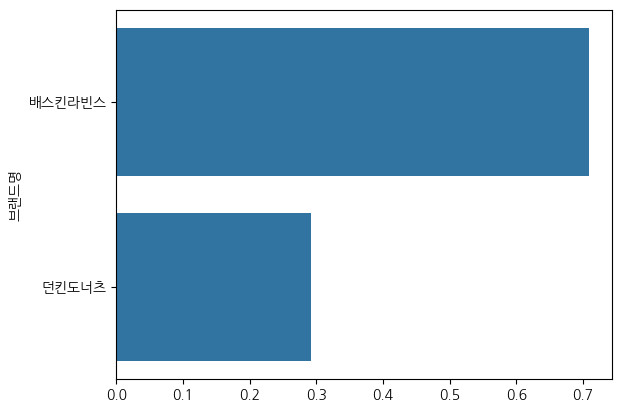

In [ ]:
sns.barplot(x = df_31['브랜드명'].value_counts(normalize = True).values,
            y = df_31['브랜드명'].value_counts(normalize = True).index)

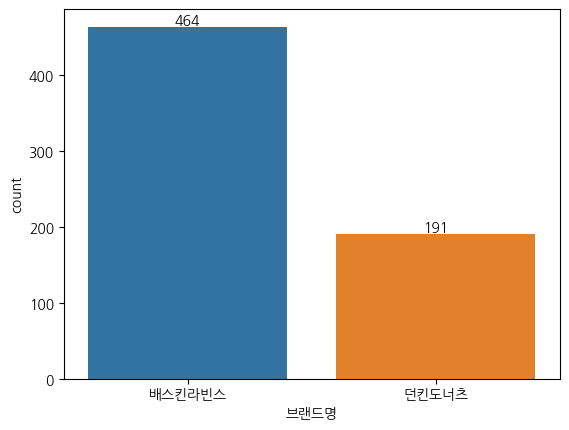

In [ ]:
g = sns.countplot(data = df_31, x = '브랜드명', hue = '브랜드명')

# hue plot은 여러개의 container를 가지고 있기 때문에 g.containers가 반복되어야 한다
for container in g.containers:
    g.bar_label(container)

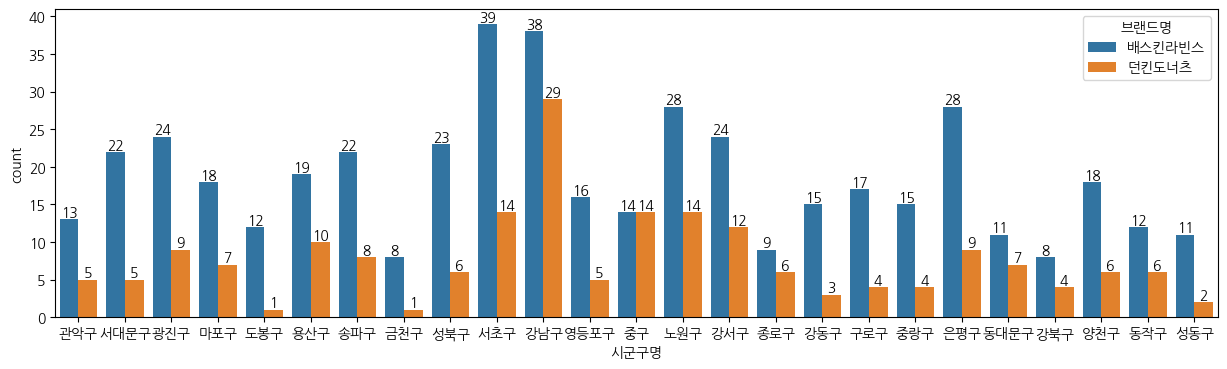

In [ ]:
# 시군구별 배스킨라빈스와 던킨도너츠의 빈도수
plt.figure(figsize = (15, 4))
g = sns.countplot(data = df_31, x = '시군구명', hue = '브랜드명')

for container in g.containers:
  g.bar_label(container)

### scatterplot 그리기

<Axes: xlabel='경도', ylabel='위도'>

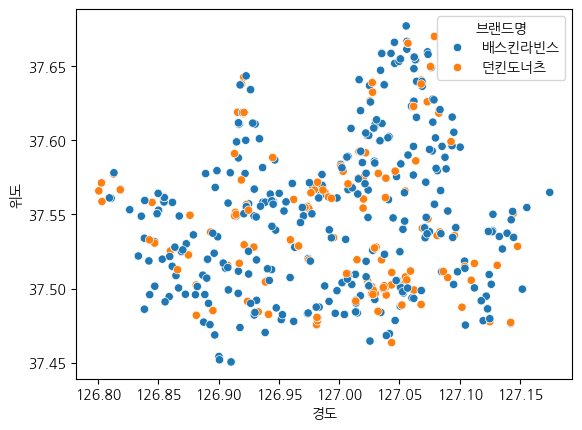

In [ ]:
sns.scatterplot(data = df_31, x = '경도', y = '위도', hue = '브랜드명')

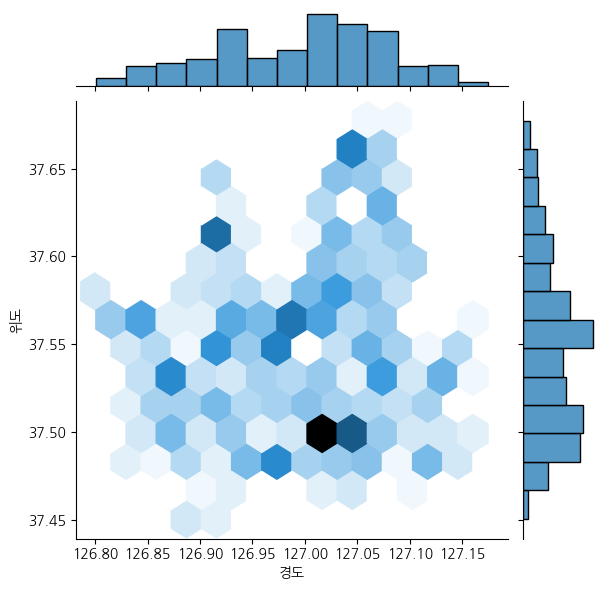

In [ ]:
sns.jointplot(data = df_31, x = '경도', y = '위도', kind = 'hex')

### folium으로 지도에 표시

In [ ]:
import folium

In [ ]:
lat = df_31['위도'].mean()
long = df_31['경도'].mean()
lat, long

(37.548567678569114, 126.99419527148807)

In [ ]:
# 지도에 표시할 데이터를 무작위로 1개 추출
df_31.sample(random_state = 31)

상가업소번호    상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
276889  9100544  던킨도너츠  역삼4호점         Q       음식       Q07    패스트푸드    Q07A06   

       상권업종소분류명 표준산업분류코드  ...              도로명주소   구우편번호   신우편번호  동정보  층정보  \
276889    도너츠전문   I56191  ...  서울특별시 강남구 논현로 341  135080  6248.0    1  NaN   

        호정보          경도         위도 상호명_소문자   브랜드명  
276889  101  127.039032  37.495593   던킨도너츠  던킨도너츠  

[1 rows x 41 columns]

In [ ]:
m = folium.Map(location = [lat, long], zoom_start = 12)

folium.Marker(
    [37.495593, 127.039032],
    popup = '<i>던킨도너츠<i>',
    tooltop = '던킨도너츠').add_to(m)

m

#### 기본마커로 표시하기

In [ ]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:

    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]

    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"

    popup = folium.Popup(f'<i>{title}<i>',
                         max_width = 600,
                         max_height = 600)

    folium.Marker(
        [sub_lat, sub_long],
        icon = folium.Icon(color=icon_color),
        popup = popup,
        tooltip = title).add_to(m)

m

#### MarkerCluster로 표시하기

In [ ]:
from folium.plugins import MarkerCluster

MarkerCluster?

In [ ]:
m = folium.Map([lat, long], zoom_start = 12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:

  sub_lat = df_31.loc[i, '위도']
  sub_long = df_31.loc[i, '경도']
  title = df_31.loc[i, '상호명'] + ' - ' + df_31.loc[i, "도로명주소"]

  icon_color = 'blue'
  if df_31.loc[i, "브랜드명"] == '던킨도너츠':
    icon_color = 'red'

  folium.Marker(
      [sub_lat, sub_long],
      icon = folium.Icon(color = icon_color),
      popup = folium.Popup(f'<i>{title}<i>',
                           max_width = 600,
                           max_height = 600),
      tooltip = title).add_to(marker_cluster)

m

## 파리바게트, 뚜레쥬르 위치 분석

### 파리바게트와 뚜레쥬르만 가져오기

In [ ]:
df_seoul['상호명'].str.extract("(뚜레쥬르|뚜레주르)")[0].value_counts()

0
뚜레쥬르    257
뚜레주르      1
Name: count, dtype: int64

In [ ]:
df_seoul['상호명'].str.extract('(파리바게|파리크라상)')[0].value_counts()

0
파리바게     514
파리크라상     53
Name: count, dtype: int64

In [ ]:
df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(쥬|주)|파리(바게|크라상)')].copy()
df_bread.shape

<ipython-input-29-86cfdc6073e0>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(쥬|주)|파리(바게|크라상)')].copy()


(825, 12)

In [ ]:
# 데이터를 제대로 가져왔는지 확인
df_bread['상권업종대분류명'].value_counts()

상권업종대분류명
음식       823
학문/교육      2
Name: count, dtype: int64

In [ ]:
df_bread[df_bread['상권업종대분류명'].isin(['학문/교육'])]

상호명 상권업종대분류명    상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명    법정동명  \
354693  파리바게뜨교육소    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시  영등포구  영등포동  영등포동8가   
406627      뚜레쥬르    학문/교육  학원-자격/국가고시  학원-제과기술  서울특별시   금천구   가산동     가산동   

                        도로명주소          경도         위도   상호명_소문자  
354693     서울특별시 영등포구 영중로 159  126.905405  37.530553  파리바게뜨교육소  
406627  서울특별시 금천구 가산디지털1로 128  126.883684  37.477224      뚜레쥬르

In [ ]:
df_bread = df_bread[~df_bread['상권업종대분류명'].isin(['학문/교육'])].copy()
df_bread.shape

(823, 12)

In [ ]:
df_bread['상호명'].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [ ]:
df_bread[df_bread['상호명'].str.contains('파스쿠찌|잠바주스')]

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명  시군구명  행정동명  \
150108       파리크라상파스쿠찌홍       음식   커피점/카페  커피전문점/카페/다방  서울특별시   마포구   서강동   
150916       파리크라상파스쿠찌압       음식  제과제빵떡케익          제과점  서울특별시   강남구  압구정동   
165698       파리크라상파스쿠찌서       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구   이화동   
166894       파리크라상파스쿠찌도       음식   커피점/카페  커피전문점/카페/다방  서울특별시   강남구  삼성1동   
167937       파리크라상파스쿠찌서       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구   이화동   
173293  파리크라상파스쿠찌압구정역2호       음식  제과제빵떡케익          제과점  서울특별시   강남구   신사동   
173492     파리크라상잠바주스디큐브       음식   커피점/카페     생과일주스전문점  서울특별시   구로구  신도림동   
173775     파리크라상잠바주스대치역       음식  제과제빵떡케익          제과점  서울특별시   강남구  대치1동   
263755       파리크라상잠바주스동       음식  제과제빵떡케익          제과점  서울특별시   용산구  이촌1동   
267247       파리크라상잠바주스삼       음식  제과제빵떡케익          제과점  서울특별시   서초구  서초2동   
279459     파리크라상파스쿠찌신촌연       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구   신촌동   

        법정동명                 도로명주소          경도         위도          상호명_소문자  
150108   상수동     서울특별시 마포구 와우산로 94  126.924922  37.552600       파리크라상파스쿠찌홍  
150916   신사동     서울특별시 강남구 논현로 868  127.028866  37.526073       파리크라상파스쿠찌압  
165698   연건동   서울특별시 종로구 대학로5가길 23  127.001032  37.578832       파리크라상파스쿠찌서  
166894   삼성동  서울특별시 강남구 테헤란로87길 22  127.059427  37.509624       파리크라상파스쿠찌도  
167937   연건동     서울특별시 종로구 대학로 101  126.997184  37.580448       파리크라상파스쿠찌서  
173293   신사동    서울특별시 강남구 압구정로 162  127.027449  37.526305  파리크라상파스쿠찌압구정역2호  
173492  신도림동     서울특별시 구로구 경인로 662  126.888485  37.508058     파리크라상잠바주스디큐브  
173775   대치동  서울특별시 강남구 남부순환로 2942  127.062308  37.493635     파리크라상잠바주스대치역  
263755   이촌동     서울특별시 용산구 이촌로 245  126.974348  37.520170       파리크라상잠바주스동  
267247   서초동  서울특별시 서초구 서초대로78길 22  127.027528  37.495796       파리크라상잠바주스삼  
279459   창천동     서울특별시 서대문구 연세로 22  126.937074  37.557576     파리크라상파스쿠찌신촌연

In [ ]:
df_bread = df_bread[~df_bread["상호명"].str.contains('파스쿠찌|잠바주스')].copy()
df_bread.shape

(812, 12)

In [ ]:
# '브랜드명' column 생성
df_bread.loc[df_bread['상호명'].str.contains('파리바게'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('파리크라상'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레'), '브랜드명'] = '뚜레쥬르'
df_bread[["상호명", "브랜드명"]].head()

상호명   브랜드명
2935          뚜레쥬르   뚜레쥬르
13843         뚜레쥬르   뚜레쥬르
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운   뚜레쥬르

In [ ]:
df_bread['브랜드명'].isnull().sum()

0

### countplot

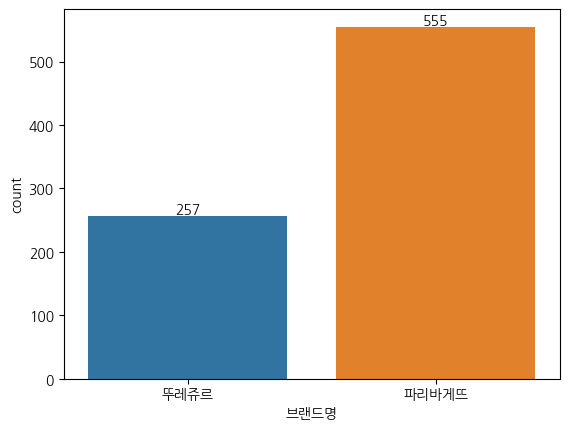

In [ ]:
g = sns.countplot(data = df_bread, x = '브랜드명', hue = '브랜드명')
for container in g.containers:
  g.bar_label(container)

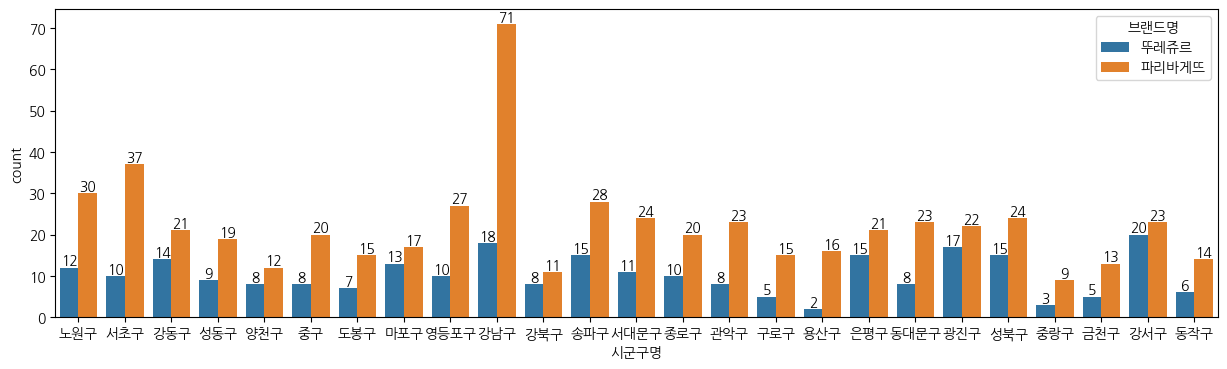

In [ ]:
plt.figure(figsize = (15,4))
g = sns.countplot(data = df_bread, x = '시군구명', hue = '브랜드명')

for container in g.containers:
  g.bar_label(container)

### scatterplot

<Axes: xlabel='경도', ylabel='위도'>

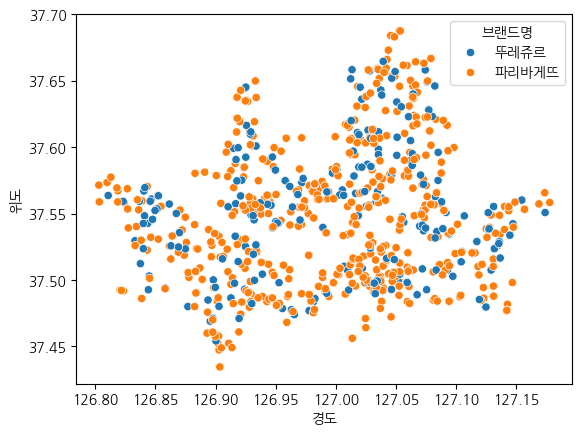

In [ ]:
sns.scatterplot(data = df_bread, x = '경도', y = '위도', hue = '브랜드명')

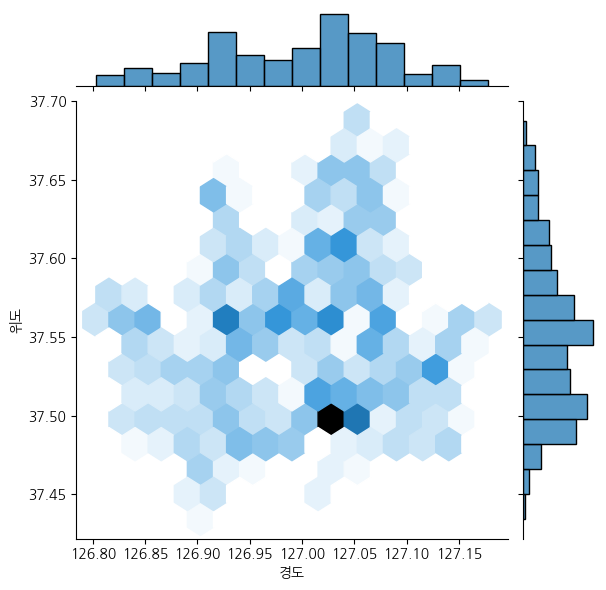

In [ ]:
sns.jointplot(data = df_bread, x = '경도', y = '위도', kind = 'hex')

### folium으로 지도에 표시

#### CircleMarker로 표시하기

In [ ]:
m = folium.Map([lat, long], zoom_start = 12)

for i in df_bread.index:

  sub_lat = df_bread.loc[i, '위도']
  sub_long = df_bread.loc[i, '경도']
  title = df_bread.loc[i, '상호명'] + ' - ' + df_bread.loc[i, '도로명주소']

  icon_color = 'blue'
  if df_bread.loc[i, '브랜드명'] == '뚜레쥬르':
    icon_color = 'green'

  popup = folium.Popup(f'<i>{title}<i>',
                       max_width = 600,
                       max_height = 600)

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 5,
      color = icon_color,
      popup = popup,
      tooltip = title).add_to(m)

m

#### MarkerCluster로 표시하기

In [ ]:
m = folium.Map([lat, long], zoom_start = 12)

marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:

  sub_lat = df_bread.loc[i, '위도']
  sub_long = df_bread.loc[i, '경도']
  title = df_bread.loc[i, '상호명'] + ' - ' + df_bread.loc[i, '도로명주소']

  icon_color = 'blue'
  if df_bread.loc[i, '브랜드명'] == '뚜레쥬르':
    icon_color = 'green'

  popup = folium.Popup(f'<i>{title}<i>',
                       max_width = 600,
                       max_height = 600)

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 5,
      color = icon_color,
      popup = popup,
      tooltip = title).add_to(marker_cluster)

m

#### Heatmap으로 표시하기

In [ ]:
from folium.plugins import HeatMap

m = folium.Map([lat, long], zoom_start = 12)

for i in df_bread.index:

  sub_lat = df_bread.loc[i, '위도']
  sub_long = df_bread.loc[i, '경도']
  title = df_bread.loc[i, '상호명'] + ' - ' + df_bread.loc[i, '도로명주소']

  icon_color = 'blue'
  if df_bread.loc[i, '브랜드명'] == '뚜레쥬르':
    icon_color = 'green'

  popup = folium.Popup(f'<i>{title}<i>',
                       max_width = 600,
                       max_height = 600)

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 3,
      color = icon_color,
      popup = popup,
      tooltip = title).add_to(m)

HeatMap(df_bread[['위도', '경도']]).add_to(m)

m